In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [28]:
df = pd.read_csv("BIKE DETAILS.csv")

In [31]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [33]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [34]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [35]:
df['ex_showroom_price'].fillna(df['ex_showroom_price'].mean(),inplace = True)

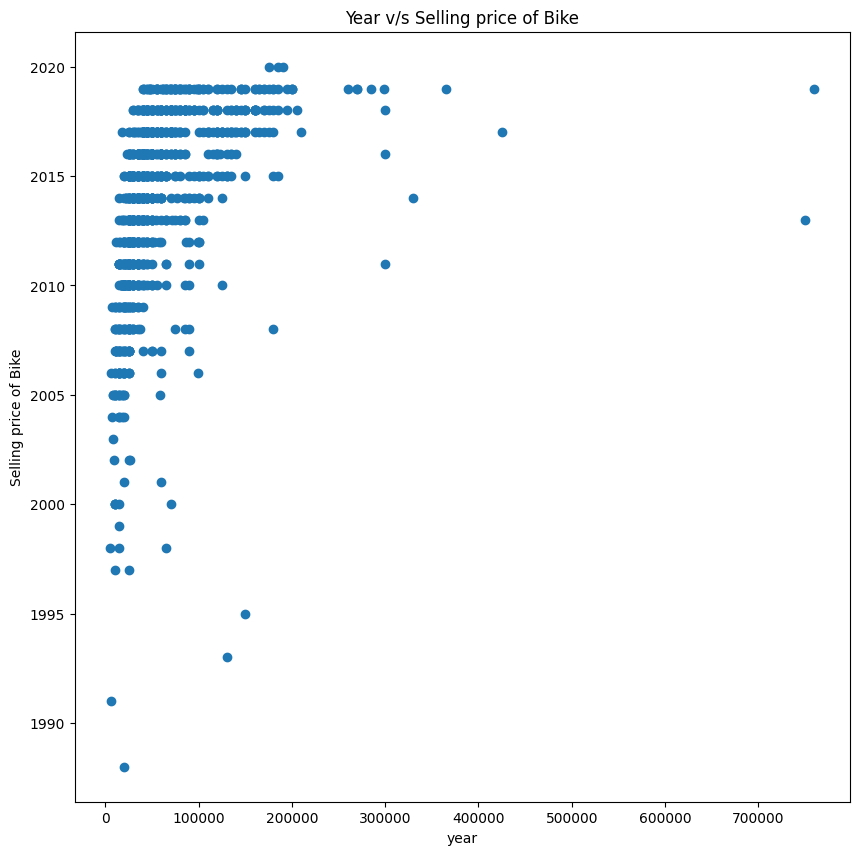

In [42]:
# Visualize data

# 1. Scatter Plot

plt.figure(figsize=(10,10))
plt.title("Year v/s Selling price of Bike")
x = df['selling_price']
y = df['year']
plt.scatter(x,y)
plt.xlabel("year")
plt.ylabel("Selling price of Bike")
plt.show()

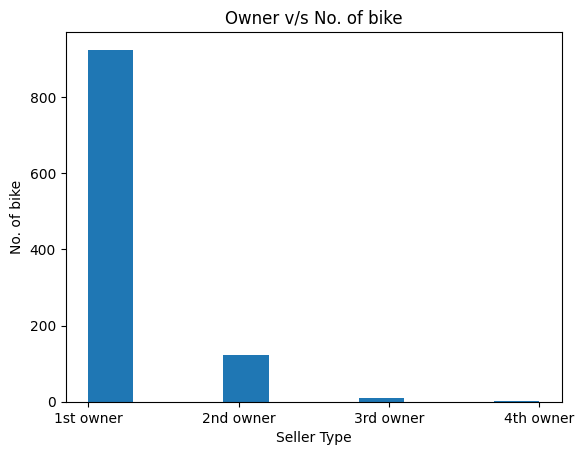

In [45]:
# 2.Histogram

plt.hist(df['owner'])
plt.xlabel('Seller Type')
plt.ylabel('No. of bike')
plt.title("Owner v/s No. of bike")
d = df['owner'].value_counts()

plt.show()

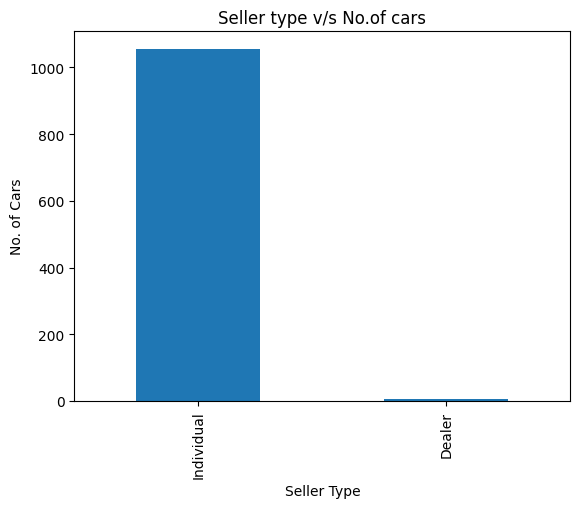

In [47]:
# 3. Bar Plot

df['seller_type'].value_counts().plot(kind='bar')
plt.xlabel('Seller Type')
plt.ylabel('No. of Cars')
plt.title("Seller type v/s No.of cars")
d = df['seller_type'].value_counts()
plt.show()

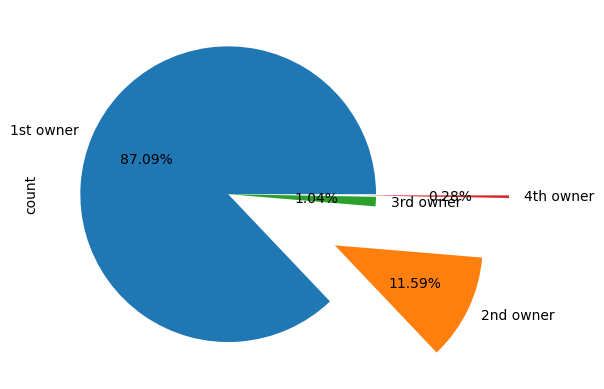

In [51]:
# 4. Pie plot

df['owner'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=(0,0.8,0,0.9))
plt.show()

In [52]:
# Preprocessing

# Handle categorical data

le = LabelEncoder()
df['year'] = le.fit_transform(df['name'])


In [54]:
# separating feature and target

x = df.iloc[:,:-1]     # all col except price
y = df.iloc[:,-1]      # all rows of last col

In [55]:
y.head()

0     87958.714058
1     87958.714058
2    148114.000000
3     89643.000000
4     87958.714058
Name: ex_showroom_price, dtype: float64

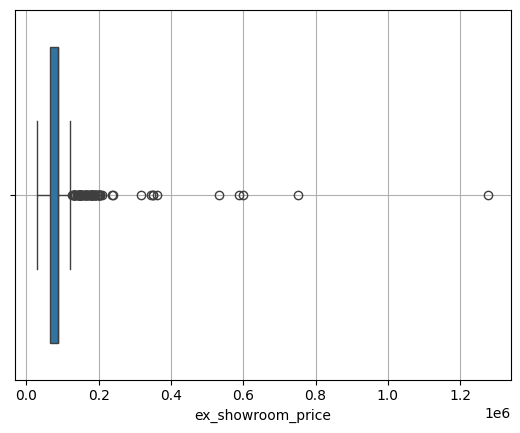

In [56]:
# Find out outliers

sns.boxplot(data=x,x=y)
plt.grid()
plt.show()

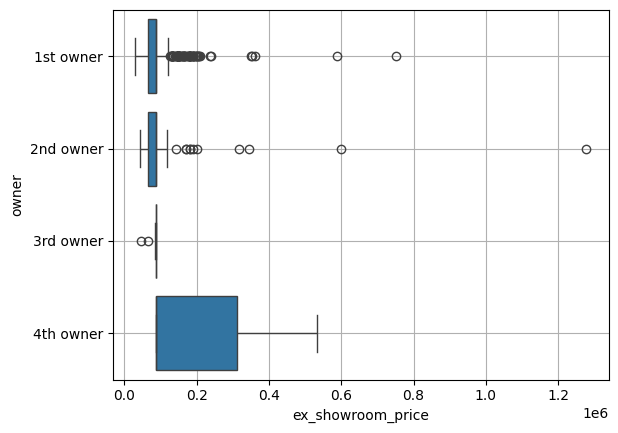

In [85]:
sns.boxplot(data=x,x=y,y='owner')
plt.grid()
plt.show()

In [89]:
x[(x.owner=='2nd owner') & (y > 0.0)]

,name,selling_price,year,seller_type,owner,km_driven
4,Yamaha SZ [2013-2014],20000,269,Individual,2nd owner,21000
7,Royal Enfield Bullet 350 [2007-2011],180000,177,Individual,2nd owner,39000
11,Honda Navi,28000,152,Individual,2nd owner,10000
17,Yamaha YZF R15 S,40000,274,Individual,2nd owner,45000
22,Honda Activa i,32000,128,Individual,2nd owner,20696
32,Hero Xtreme Sports,43000,120,Individual,2nd owner,50000
47,Yamaha FZ16,30000,254,Individual,2nd owner,26000
49,Yamaha FZ16,35000,254,Individual,2nd owner,29000
52,Royal Enfield Electra 5 S,90000,190,Individual,2nd owner,40000
53,Hero Splendor PRO,35000,111,Individual,2nd owner,24000


In [92]:
x[(x.owner=='3rd owner') & (y > 0.0)]

,name,selling_price,year,seller_type,owner,km_driven
28,Yamaha Fazer [2009-2016],40000,261,Individual,3rd owner,35000
39,Royal Enfield Thunderbird 350,90000,197,Individual,3rd owner,13000
202,Bajaj Pulsar 135 LS,56000,34,Individual,3rd owner,37714
306,Yamaha Rx,70000,266,Individual,3rd owner,5000
428,Hero Honda Karizma ZMR [2010],45000,80,Individual,3rd owner,44000
457,Mahindra Flyte,22000,172,Individual,3rd owner,20000
554,Yamaha RX135,65000,263,Individual,3rd owner,16500
667,Hero Passion Pro 110,20000,102,Individual,3rd owner,40000
796,Hero Honda CD Deluxe,25000,74,Individual,3rd owner,65000
868,Royal Enfield Bullet 350 [2007-2011],150000,177,Individual,3rd owner,20000


In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['owner', 'ex_showroom_price']] = scaler.fit_transform(df[['year', 'selling_price']])


In [94]:
x=df['owner'] #feature

y=df["selling_price"]  #target

In [95]:
# Split dataset into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [96]:
# Model : Linear Regression Model

lr = LinearRegression()

In [97]:
lr.fit(np.array(x_train).reshape(-1,1),y_train)

LinearRegression()

In [98]:
#intercept

lr.intercept_

60626.53995908504

In [99]:
#Slope

lr.coef_

array([12748.1183656])

In [106]:
# Calculating ypredict

y_pred = lr.predict(np.array(x_train).reshape(-1,1))
y_pred

array([45759.64378914, 75348.35808395, 64543.49050439, 78174.24652784,
       82662.42229166, 63546.11811243, 73187.38456804, 58891.71361661,
       51910.10687289, 72688.69837206, 45593.41505715, 52242.56433688,
       64211.0330404 , 45925.87252113, 51245.19194492, 61551.37332851,
       62548.74572047, 58891.71361661, 61551.37332851, 43931.12773721,
       60387.77220455, 70029.03866017, 81332.59243571, 43931.12773721,
       55400.91024475, 64211.0330404 , 59722.85727658, 60886.45840053,
       52242.56433688, 82329.96482767, 77010.64540389, 43764.89900522,
       60886.45840053, 61052.68713253, 41770.1542213 , 54569.76658479,
       61385.14459651, 49250.447161  , 65540.86289635, 41271.46802532,
       64709.71923638, 69031.66626821, 45593.41505715, 46424.55871711,
       50414.04828495, 60221.54347256, 63878.57557641, 58559.25615263,
       73187.38456804, 60886.45840053, 67868.06514425, 43266.21280924,
       62548.74572047, 45593.41505715, 78340.47525983, 69197.8950002 ,
      

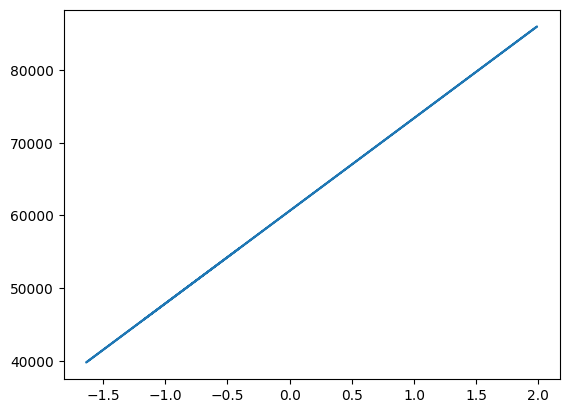

In [101]:
# Scatterplot

plt.figure()
#sns.scatterplot(x_train,y_train)
plt.plot(x_train,y_pred)
plt.show()

In [102]:
# Testing

y_pred = lr.predict(np.array(x_test).reshape(-1,1))
y_pred

array([81498.82116771, 45593.41505715, 60886.45840053, 64044.80430841,
       85654.53946754, 81997.50736369, 45593.41505715, 59556.62854459,
       45925.87252113, 46923.24491309, 80501.44877575, 81498.82116771,
       81997.50736369, 45925.87252113, 51411.42067691, 78672.93272382,
       65374.63416435, 67203.15021628, 70029.03866017, 67203.15021628,
       52076.33560489, 57395.65502867, 55068.45278077, 41437.69675731,
       65208.40543236, 74849.67188797, 45593.41505715, 51910.10687289,
       69696.58119618, 72356.24090807, 51078.96321293, 45593.41505715,
       43266.21280924, 48751.76096502, 61883.83079249, 56564.51136871,
       62382.51698847, 81498.82116771, 72688.69837206, 48585.53223303,
       60720.22966854, 41770.1542213 , 83992.25214761, 81997.50736369,
       52076.33560489, 56730.7401007 , 72356.24090807, 52741.25053286,
       61551.37332851, 45593.41505715, 64211.0330404 , 62382.51698847,
       42268.84041728, 81997.50736369, 50912.73448093, 61551.37332851,
      

In [103]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [104]:
# Evaluation of model

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mse)
print(rmse)
print(mae)
print(r2)

1922174399.565164
43842.609406434334
30407.5048383417
0.09571829779247842
